# Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 


In [3]:
# Installing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
# Import dataset
df=pd.read_csv('E://EXCELR//Data science//Data science assignment//9) Association Rules//my_movies.csv')
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
df.shape

(10, 15)

In [6]:
df.drop(['V1','V2','V3','V4','V5'],axis=1,inplace=True)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [7]:
# creating total of each movie budget 
s=df.sum()
s

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

<AxesSubplot:>

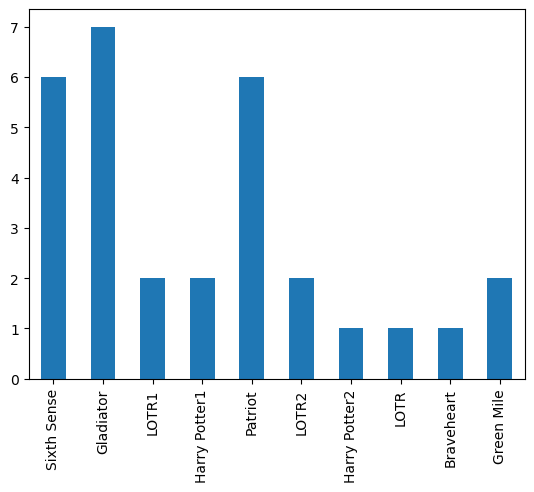

In [8]:
s.plot.bar()

Since the gladiator and patriot are the top three most bought movies

# 1) Apriori algorithm with iterating support values and min keeping confidenace = 0.5

In [42]:
import warnings
warnings.filterwarnings("ignore")


In [43]:
min_support=[]
len_rules=[]
itemset=[]
i=0

for s in np.arange(0.01,0.420,0.010):
    frequent_item = apriori(df, min_support=s, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=0.5)
    item_length=len(frequent_item)
    rule_length=len(rules)
    min_support.append(s)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 41


In [10]:
d={'Minimum support':min_support,'Frequent itemsets':itemset,'Association rules number':len_rules}
sup_rules=pd.DataFrame(d)
sup_rules.head()

,Minimum support,Frequent itemsets,Association rules number
0,0.01,53,216
1,0.02,53,216
2,0.03,53,216
3,0.04,53,216
4,0.05,53,216


(0.0, 226.6)

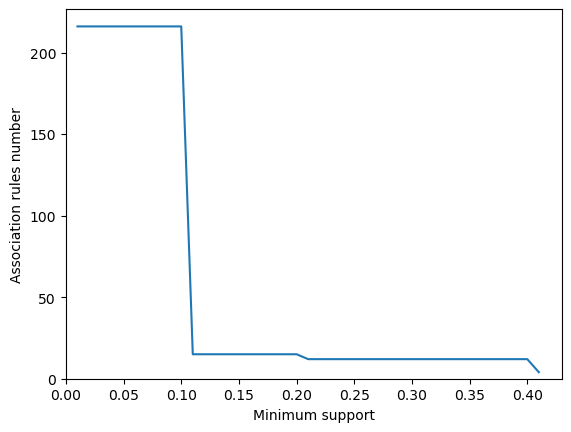

In [11]:
sns.lineplot(data=sup_rules, x="Minimum support", y="Association rules number")
plt.xlim(0,)
plt.ylim(0,)


The graph shows that association rules remained constant with increasing support values till support=0.01.Beyond this value, the association rules drastically decreased to around 10 and beyond support value of 0.40 ,no association rules were formed.



# Apriori algorithm with itearating confidence values and min support = 0.001

In [44]:
min_conf=[]
len_rules=[]
itemset=[]
i=0

for t in np.arange(0.1,1.025,0.025):
    frequent_item = apriori(df, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=t)
    item_length=len(frequent_item)
    rule_length=len(rules)
    min_conf.append(t)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 37


In [13]:
c={'Minimum confidence':min_conf,'Frequent itemsets':itemset,'Association rules number':len_rules}
conf_rules=pd.DataFrame(c)
conf_rules.head()

,Minimum confidence,Frequent itemsets,Association rules number
0,0.100,53,250
1,0.125,53,250
2,0.150,53,242
3,0.175,53,220
4,0.200,53,220


<AxesSubplot:xlabel='Minimum confidence', ylabel='Association rules number'>

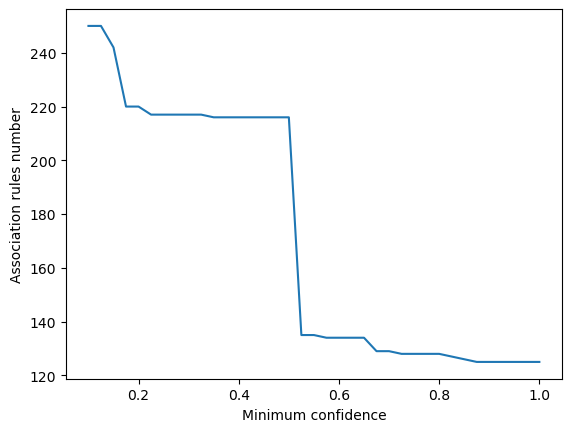

In [14]:
sns.lineplot(data=conf_rules, x="Minimum confidence", y="Association rules number")

 Changing min length in apriori algorithm and observing the changes in number of assocaition ruls formed

In [45]:
k_itemset=[]
len_rules=[]
itemset=[]
i=0

for l in range(1,60):
    frequent_item = apriori(df, max_len=l,min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=0.5)
    item_length=len(frequent_item)
    rule_length=len(rules)
    k_itemset.append(l)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 59


In [18]:
a={'Length_itemset':k_itemset,'Frequent itemsets':itemset,'Association rules number':len_rules}
itemset_rules=pd.DataFrame(a)
itemset_rules.head()


,Length_itemset,Frequent itemsets,Association rules number
0,1,10,0
1,2,30,31
2,3,46,110
3,4,52,187
4,5,53,216


(0.0, 226.8)

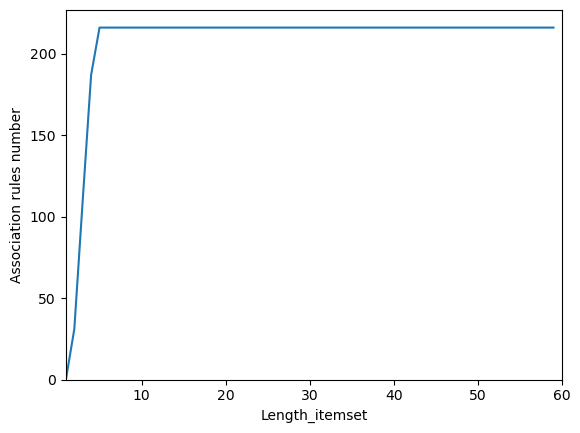

In [19]:
sns.lineplot(data=itemset_rules, x="Length_itemset", y="Association rules number")
plt.xlim(1,60)
plt.ylim(0,)


# Association rules generation by running Apriori with min support = 0.01 and min confidence = 0.5

In [20]:
# generating frequent itemset
frequent_itemsets= apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

C:\Users\91771\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [21]:
print("Number of frequent itemsets generated with min support=0.1 is:",(frequent_itemsets.shape[0]))


Number of frequent itemsets generated with min support=0.1 is: 53


In [22]:
# adding a length column which stores the length of item sets generated
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))


In [23]:
frequent_itemsets.head()

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1


In [24]:
# checking the number of frequent itemsets generated for each length
frequent_itemsets['length'].value_counts()

2    20
3    16
1    10
4     6
5     1
Name: length, dtype: int64

Max number of frequent sets belong to  length  2 

In [25]:
rules = association_rules(frequent_itemsets,metric="confidence", min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


In [26]:
rules.describe()

C:\Users\91771\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.0,216.000000
mean,0.166667,0.243981,0.120833,0.799118,4.954659,0.073056,inf,0.810995
std,0.117335,0.198508,0.082863,0.240568,2.879200,0.027835,NaN,0.281314
min,0.100000,0.100000,0.100000,0.500000,0.714286,-0.040000,0.6,-0.333333
25%,0.100000,0.100000,0.100000,0.500000,2.500000,0.060000,1.8,0.750000
50%,0.100000,0.200000,0.100000,1.000000,5.000000,0.080000,NaN,0.888889
75%,0.200000,0.200000,0.100000,1.000000,5.000000,0.080000,NaN,1.000000
max,0.700000,0.700000,0.600000,1.000000,10.000000,0.180000,inf,1.000000


In [27]:
print("Total number of association rules generated with min support=0.01 and min confidence=0.5 is:",(rules.shape[0]))


Total number of association rules generated with min support=0.01 and min confidence=0.5 is: 216


# Visualization of Association rules

# 1) Scatter Plot

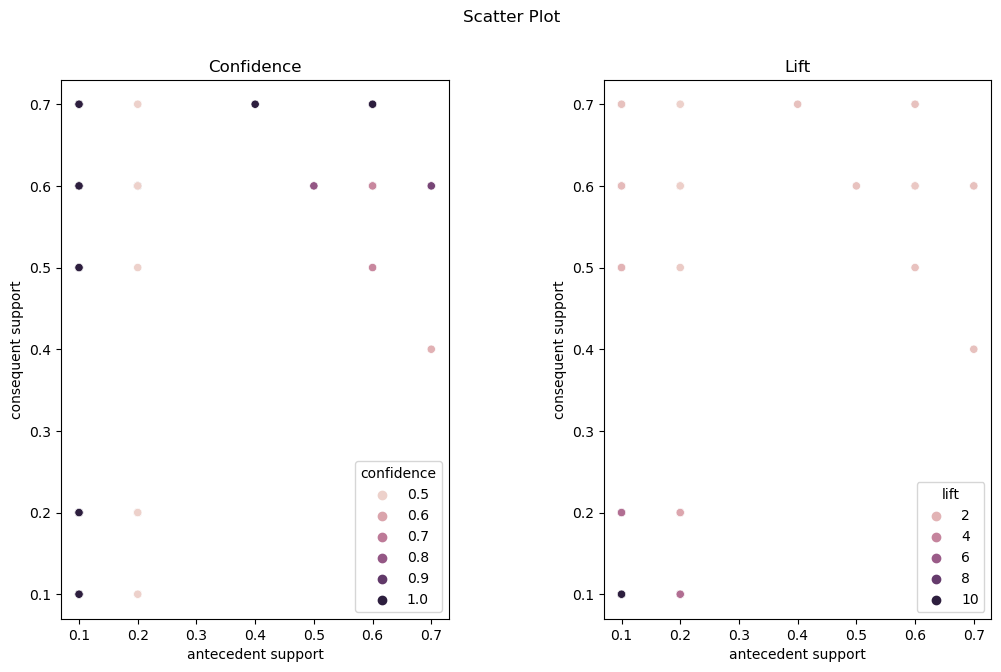

In [28]:
fig, axes = plt.subplots(1,2, figsize=(12,7))
fig.suptitle('Scatter Plot')

sns.scatterplot(ax=axes[0],x='antecedent support',y='consequent support',hue='confidence',data=rules)
axes[0].set_title('Confidence')

sns.scatterplot(ax=axes[1],x='antecedent support',y='consequent support',hue='lift',data=rules)
axes[1].set_title('Lift')

plt.subplots_adjust(wspace=0.4)
plt.show()

# 2) Heat Map

In [29]:
rules_map=rules.copy()

In [30]:
# selecting rules with high confidence,lift and support
rules_map=rules_map.loc[(rules_map['lift']>9)& (rules_map['confidence']>0.8)& (rules_map['support']>0.05)]


In [31]:
rules_map.reset_index(drop=True,inplace=True)


In [32]:
# creating a subset of first 10 rules which will be plotted with heatmap
rules_10=rules_map.iloc[0:10,:]
rules_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
1,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
2,"(Gladiator, Green Mile, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
3,"(Gladiator, Green Mile)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
4,"(Sixth Sense, LOTR)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
5,(LOTR),"(Gladiator, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
6,"(Harry Potter1, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
7,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
8,"(LOTR1, Sixth Sense)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
9,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0


In [33]:
# converting antecedents and consequents to strings
rules_10['antecedents']=rules_10['antecedents'].apply(lambda a: ','.join(list(a)))
rules_10['consequents']=rules_10['consequents'].apply(lambda a: ','.join(list(a)))


C:\Users\91771\AppData\Local\Temp\ipykernel_13360\2780928418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_10['antecedents']=rules_10['antecedents'].apply(lambda a: ','.join(list(a)))
C:\Users\91771\AppData\Local\Temp\ipykernel_13360\2780928418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_10['consequents']=rules_10['consequents'].apply(lambda a: ','.join(list(a)))


In [34]:
print(rules_10[['antecedents','consequents']])


                        antecedents                       consequents
0              Gladiator,Green Mile                              LOTR
1                              LOTR              Gladiator,Green Mile
2  Gladiator,Green Mile,Sixth Sense                              LOTR
3              Gladiator,Green Mile                  Sixth Sense,LOTR
4                  Sixth Sense,LOTR              Gladiator,Green Mile
5                              LOTR  Gladiator,Green Mile,Sixth Sense
6               Harry Potter1,LOTR1                 LOTR2,Sixth Sense
7               Harry Potter1,LOTR2                 LOTR1,Sixth Sense
8                 LOTR1,Sixth Sense               Harry Potter1,LOTR2
9                 LOTR2,Sixth Sense               Harry Potter1,LOTR1


In [35]:
# Constructing  pivot table
pvt_table1=rules_10.pivot(index='antecedents',columns='consequents',values='support')
pvt_table2=rules_10.pivot(index='antecedents',columns='consequents',values='confidence')
pvt_table3=rules_10.pivot(index='antecedents',columns='consequents',values='lift')


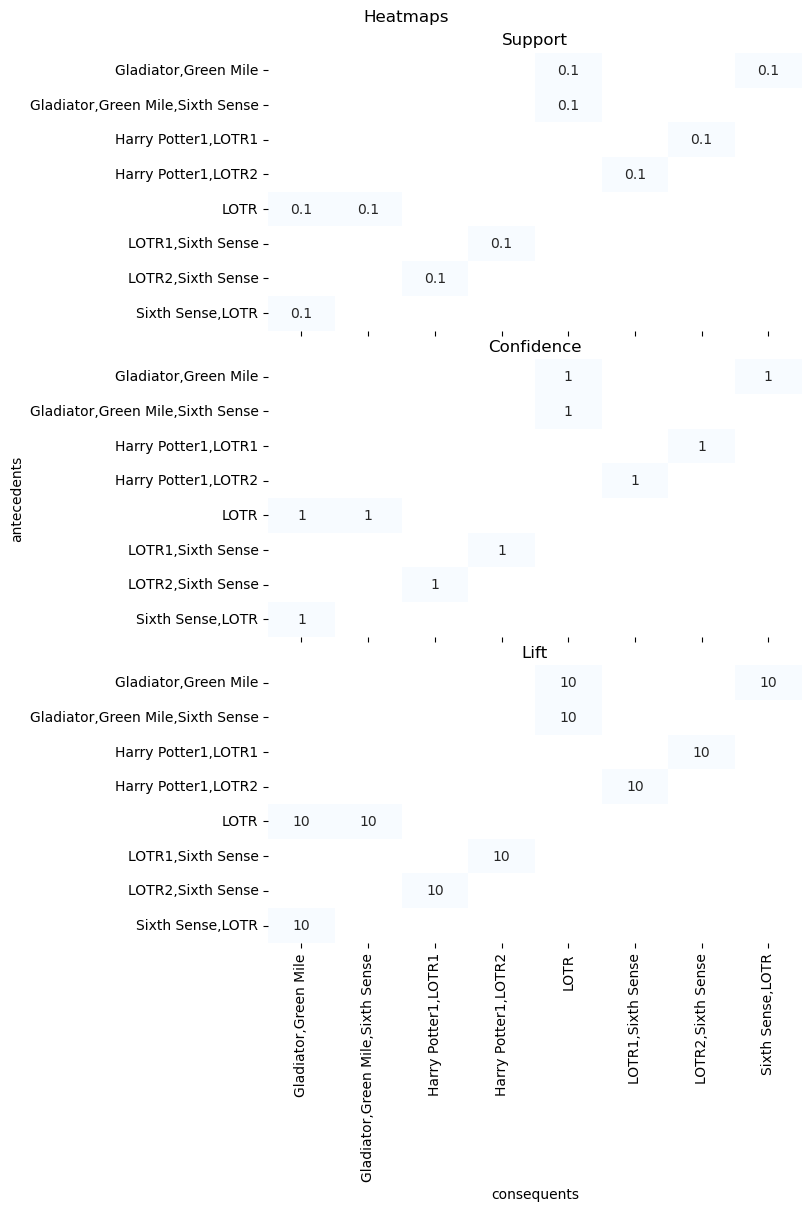

In [36]:
fig, axes = plt.subplots(3,1,sharex=True,constrained_layout = True,figsize=(8,12))
fig.suptitle('Heatmaps')

sns.heatmap(ax=axes[0],data=pvt_table1,annot=True,cbar=False,cmap='Blues')
axes[0].set_title('Support')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)

sns.heatmap(ax=axes[1],data=pvt_table2,annot=True,cbar=False,cmap='Blues')
axes[1].set_title('Confidence')
axes[1].set(xlabel=None)

sns.heatmap(ax=axes[2],data=pvt_table3,annot=True,cbar=False,cmap='Blues')
axes[2].set_title('Lift')
axes[2].set(ylabel=None)


plt.show()

# 3) Parallel coordinate plots

In [37]:
rules_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"Gladiator,Green Mile",LOTR,0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
1,LOTR,"Gladiator,Green Mile",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
2,"Gladiator,Green Mile,Sixth Sense",LOTR,0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
3,"Gladiator,Green Mile","Sixth Sense,LOTR",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
4,"Sixth Sense,LOTR","Gladiator,Green Mile",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
5,LOTR,"Gladiator,Green Mile,Sixth Sense",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
6,"Harry Potter1,LOTR1","LOTR2,Sixth Sense",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
7,"Harry Potter1,LOTR2","LOTR1,Sixth Sense",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
8,"LOTR1,Sixth Sense","Harry Potter1,LOTR2",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
9,"LOTR2,Sixth Sense","Harry Potter1,LOTR1",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0


In [40]:
# creating a column called rules to store rule numbers
rules_10['rule']=np.arange(1,11)
data=rules_10.iloc[:,[0,1,10]]
data

C:\Users\91771\AppData\Local\Temp\ipykernel_13360\2163244840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_10['rule']=np.arange(1,11)


,antecedents,consequents,rule
0,"Gladiator,Green Mile",LOTR,1
1,LOTR,"Gladiator,Green Mile",2
2,"Gladiator,Green Mile,Sixth Sense",LOTR,3
3,"Gladiator,Green Mile","Sixth Sense,LOTR",4
4,"Sixth Sense,LOTR","Gladiator,Green Mile",5
5,LOTR,"Gladiator,Green Mile,Sixth Sense",6
6,"Harry Potter1,LOTR1","LOTR2,Sixth Sense",7
7,"Harry Potter1,LOTR2","LOTR1,Sixth Sense",8
8,"LOTR1,Sixth Sense","Harry Potter1,LOTR2",9
9,"LOTR2,Sixth Sense","Harry Potter1,LOTR1",10


<AxesSubplot:>

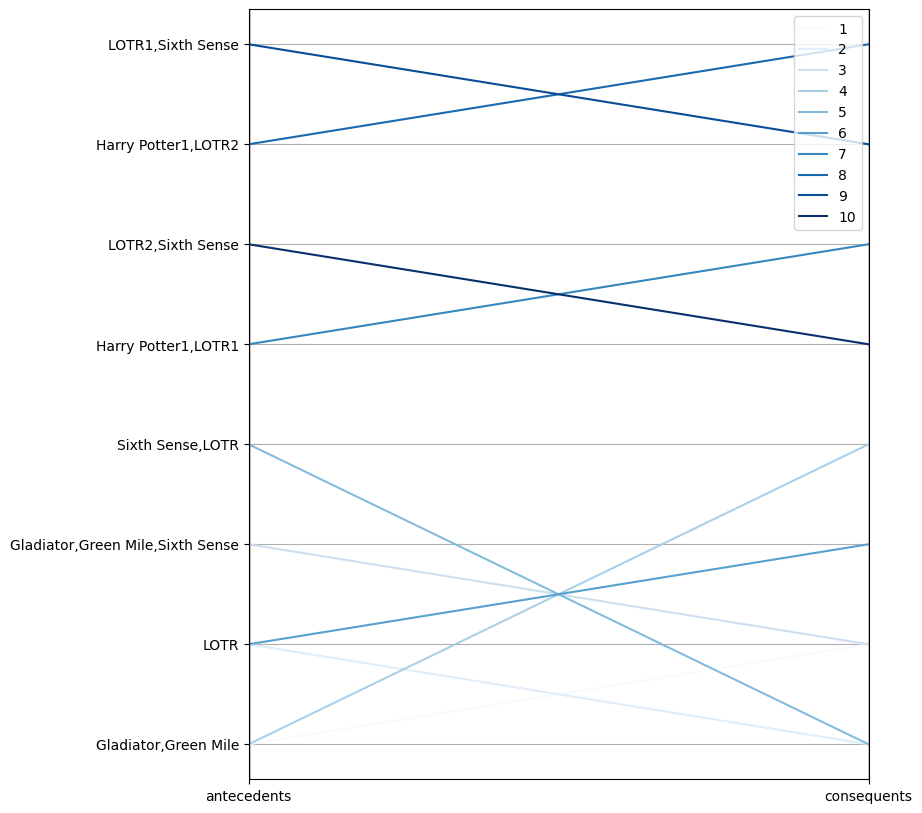

In [41]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(8,10))
parallel_coordinates(data,'rule',colormap='Blues')
